In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading dataset

glass_data = pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
#data understanding

glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


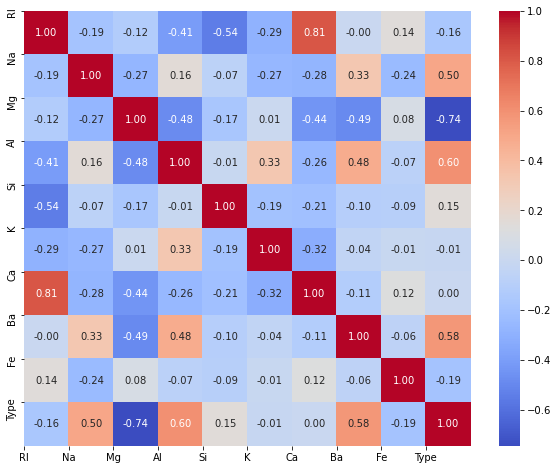

In [14]:
# data visualization

corr = glass_data.corr() #Plot figsize
fig, ax = plt.subplots(figsize=(10, 8)) #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f") #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns); #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns) #show plot
plt.show()

In [15]:
#splitting into train and test

from sklearn.model_selection import train_test_split
train,test=train_test_split(glass_data,test_size=0.3,random_state=0)

In [16]:
train.shape, test.shape

((149, 10), (65, 10))

In [17]:
#KNN
from sklearn.neighbors import KNeighborsClassifier as KNN

#finding best K value
acc=[]
for i in range(3,50,2):
    neigh=KNN(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])

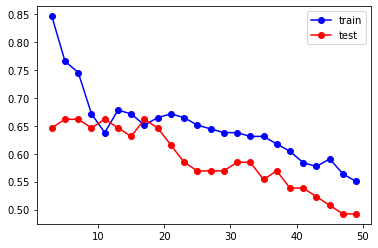

In [18]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['train','test'])

In [19]:
#from plots at k=5 we get best model
#model building at k=5 
neigh=KNN(n_neighbors=5)
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
pred_train=neigh.predict(train.iloc[:,0:9])
train_acc=np.mean(pred_train==train.iloc[:,9])
train_acc

0.7651006711409396

In [20]:
pred_test=neigh.predict(test.iloc[:,0:9])
test_acc=np.mean(pred_test==test.iloc[:,9])
test_acc

0.6615384615384615